In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
data=data.iloc[::-1]
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [4]:
data.shape

(2035, 8)

In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In this project, we are going to predict using **High** value.

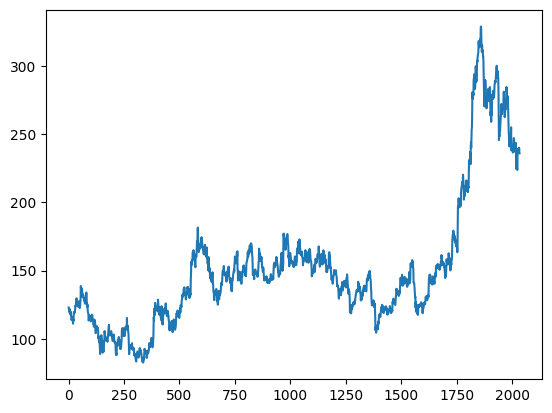

In [11]:
# Plotting High value graph
data_high=data.reset_index()['High']
plt.plot(data_high)

# Scaling


Since, LSTM is not robust to the scale of the data.
So, we need to transform the values in range 0-1.

Here, I am using Min-Max Scaler.

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data_high = scaler.fit_transform(np.array(data_high).reshape(-1,1))

In [13]:
data_high.shape

(2035, 1)

In [14]:
data_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

# Splitting the dataset

In [15]:
training_size = int(len(data_high) * 0.75)
test_size = len(data_high) - training_size
train_data,test_data = data_high[0:training_size,:], data_high[training_size:len(data_high),:1]

In [16]:
print("Training size : ",training_size)
print("Test size : ",test_size)

Training size :  1526
Test size :  509


In [17]:
train_data

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.24964424],
       [0.24679813],
       [0.24354544]])

In [18]:
test_data

array([[0.22606221],
       [0.22524903],
       [0.22646879],
       [0.23947957],
       [0.23785322],
       [0.23399065],
       [0.23399065],
       [0.2323643 ],
       [0.24883106],
       [0.24984753],
       [0.25858914],
       [0.26977028],
       [0.26509453],
       [0.23622688],
       [0.24537508],
       [0.24578166],
       [0.29111608],
       [0.29538524],
       [0.29152267],
       [0.28928644],
       [0.28542387],
       [0.29030291],
       [0.2905062 ],
       [0.28420411],
       [0.30453344],
       [0.30026428],
       [0.29030291],
       [0.29762147],
       [0.28034153],
       [0.27810531],
       [0.23744664],
       [0.23785322],
       [0.23663346],
       [0.235617  ],
       [0.22443586],
       [0.21732059],
       [0.20004066],
       [0.19353527],
       [0.19597479],
       [0.16304127],
       [0.18011791],
       [0.17300264],
       [0.15043708],
       [0.17279935],
       [0.16263468],
       [0.15531612],
       [0.15856881],
       [0.146

Since, our training and testing data in in form of array.

So, we need to convert them into dataframe.

In [19]:
# Function to create dataset

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
time_step = 100
Xtrain, Ytrain = create_dataset(train_data, time_step)
Xtest, Ytest = create_dataset(test_data, time_step)

In [21]:
print("XTrain size : ",Xtrain.shape)
print("YTrain size : ",Ytrain.shape)

XTrain size :  (1425, 100)
YTrain size :  (1425,)


In [22]:
print("XTest size : ",Xtest.shape)
print("YTest size : ",Ytest.shape)

XTest size :  (408, 100)
YTest size :  (408,)


In [23]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], Xtrain.shape[1], 1)
Xtest = Xtest.reshape(Xtest.shape[0], Xtest.shape[1], 1)

# LSTM - Long Short Term Memory

In [24]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dropout

In [25]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(Xtrain.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
model.fit(Xtrain,Ytrain,epochs=100,batch_size=32)

Epoch 1/100
45/45 [==============================] - 74s 939ms/step - loss: 0.0069
Epoch 2/100
45/45 [==============================] - 24s 510ms/step - loss: 0.0016
Epoch 3/100
45/45 [==============================] - 26s 573ms/step - loss: 0.0014
Epoch 4/100
45/45 [==============================] - 25s 543ms/step - loss: 0.0013
Epoch 5/100
45/45 [==============================] - 22s 481ms/step - loss: 0.0012
Epoch 6/100
45/45 [==============================] - 25s 572ms/step - loss: 0.0012
Epoch 7/100
45/45 [==============================] - 19s 429ms/step - loss: 0.0011
Epoch 8/100
45/45 [==============================] - 23s 499ms/step - loss: 0.0011
Epoch 9/100
45/45 [==============================] - 24s 545ms/step - loss: 9.7340e-04
Epoch 10/100
45/45 [==============================] - 18s 393ms/step - loss: 9.6151e-04
Epoch 11/100
45/45 [==============================] - 25s 551ms/step - loss: 8.9354e-04
Epoch 12/100
45/45 [==============================] - 31s 708ms/step - lo

# Prediction

In [27]:
train_predict=model.predict(Xtrain)
test_predict=model.predict(Xtest)

In [28]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Ytrain,train_predict))

136.70937508328495

In [30]:
# Test Data RMSE
math.sqrt(mean_squared_error(Ytest,test_predict))

230.123558449931

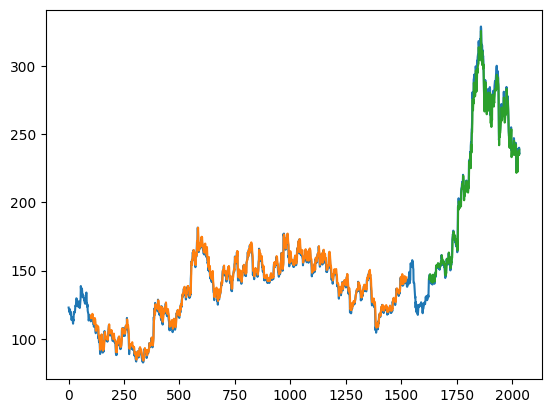

In [31]:
# Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(data_high)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_high)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_high)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

509

In [33]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 168)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.9266110998170358,
 0.9288473266924171,
 0.9107542183370603,
 0.912787151860134,
 0.8981500304940027,
 0.8623704004879038,
 0.8221183167310429,
 0.7891847936572471,
 0.7623500711526732,
 0.8196787965033541,
 0.8282171173002641,
 0.8009758080910754,
 0.8408213051433218,
 0.8383817849156332,
 0.8231347834925797,
 0.8129701158772107,
 0.7897946737141694,
 0.7782069526326487,
 0.7564545639357594,
 0.7607237243342142,
 0.7688554584265093,
 0.7806464728603375,
 0.8005692213864606,
 0.7895913803618622,
 0.7910144338280138,
 0.7893880870095547,
 0.8143931693433626,
 0.7792234193941856,
 0.7782069526326487,
 0.7851189266110996,
 0.7881683268957103,
 0.8070746086602967,
 0.8068713153079894,
 0.8196787965033541,
 0.8127668225249034,
 0.7733279121772718,
 0.7353120552957917,
 0.7460866029680828,
 0.7393779223419392,
 0.7159991868265907,
 0.7347021752388696,
 0.7438503760927018,
 0.7367351087619434,
 0.7952835942264687,
 0.7918276072372432,
 0.7979264078064647,
 0.7895913803618622,
 0.78410245984

In [35]:
Xinput = test_data[409:].reshape(1,-1)
Xinput.shape

(1, 100)

In [36]:
temp_input = list(Xinput)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):

    if(len(temp_input)>100):
        Xinput=np.array(temp_input[1:])
        print("{} day input {}".format(i,Xinput))
        Xinput=Xinput.reshape(1,-1)
        Xinput = Xinput.reshape((1, n_steps, 1))
        yhat = model.predict(Xinput, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        Xinput = Xinput.reshape((1, n_steps,1))
        yhat = model.predict(Xinput, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.6147081]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0

In [37]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [38]:
day_new.shape

(100,)

In [39]:
day_pred.shape

(28,)

In [40]:
len(data_high)

2035

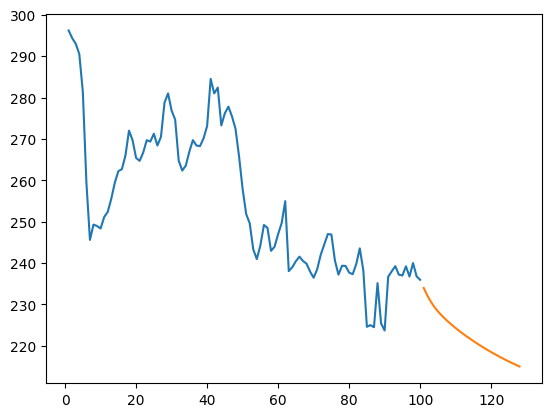

In [41]:
plt.plot(day_new, scaler.inverse_transform(data_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

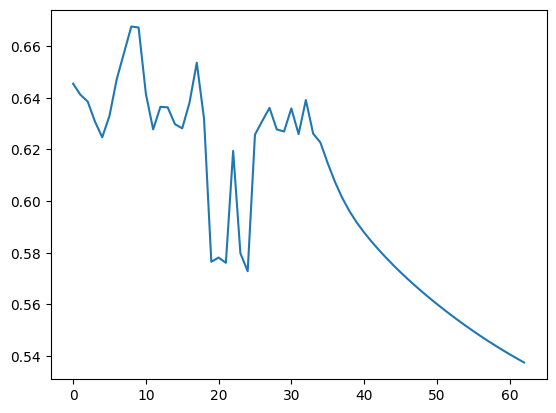

In [42]:
data_new = data_high.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

In [43]:
data_new =scaler.inverse_transform(data_new).tolist()

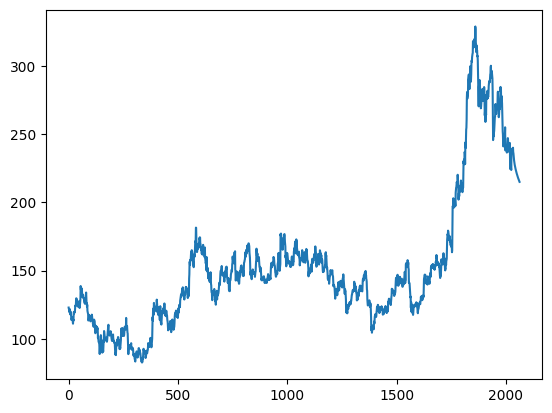

In [44]:
plt.plot(data_new)